In [1]:
import numpy as np
import matplotlib.pyplot as plt

from random import randint
from sklearn.datasets import make_classification

In [2]:
n_samples = 128
n_features = 2
n_informative = 2
n_redundant = 0
n_clusters_per_class = 1
class_sep = 2
random_state = randint(0, 10000)

X, y = make_classification(
    n_samples=n_samples,
    n_features=n_features,
    n_informative=n_informative,
    n_redundant=n_redundant,
    n_clusters_per_class=n_clusters_per_class,
    class_sep=class_sep,
    random_state=random_state
)

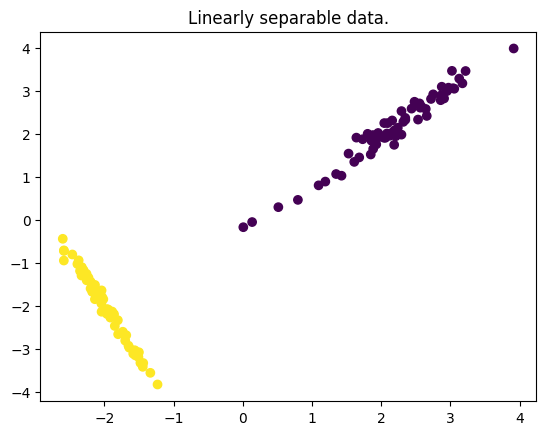

In [3]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.title('Linearly separable data.')
plt.show()

In [4]:
weights = np.ones((X.shape[1] + 1, 1))

In [5]:
weights

array([[1.],
       [1.],
       [1.]])

In [6]:
x_bias = np.hstack((np.ones((X.shape[0], 1)), X))

In [7]:
weights

array([[1.],
       [1.],
       [1.]])

In [8]:
x_bias

array([[ 1.        , -2.37300646, -0.93465995],
       [ 1.        ,  2.50633282,  2.7206209 ],
       [ 1.        ,  2.58048804,  2.64409885],
       [ 1.        ,  1.86177053,  1.85629139],
       [ 1.        , -2.60264671, -0.43332195],
       [ 1.        , -2.13792488, -1.83908469],
       [ 1.        ,  1.19253015,  0.8983786 ],
       [ 1.        ,  1.0951965 ,  0.81068438],
       [ 1.        ,  0.51340472,  0.30317932],
       [ 1.        , -1.90673704, -2.17473556],
       [ 1.        ,  1.61056237,  1.35654948],
       [ 1.        , -2.17751799, -1.66647969],
       [ 1.        , -2.01653687, -1.83847436],
       [ 1.        , -2.04470937, -1.93951505],
       [ 1.        ,  2.1246053 ,  1.96593119],
       [ 1.        , -2.46467029, -0.7983131 ],
       [ 1.        , -1.23288466, -3.82369089],
       [ 1.        ,  2.31961619,  2.28827793],
       [ 1.        , -2.30089815, -1.25934167],
       [ 1.        ,  1.88042616,  1.98106464],
       [ 1.        , -2.1269254 , -1.738

In [9]:
x_bias[y.T==0] = -x_bias[y.T==0]

In [10]:
x_bias

array([[ 1.        , -2.37300646, -0.93465995],
       [-1.        , -2.50633282, -2.7206209 ],
       [-1.        , -2.58048804, -2.64409885],
       [-1.        , -1.86177053, -1.85629139],
       [ 1.        , -2.60264671, -0.43332195],
       [ 1.        , -2.13792488, -1.83908469],
       [-1.        , -1.19253015, -0.8983786 ],
       [-1.        , -1.0951965 , -0.81068438],
       [-1.        , -0.51340472, -0.30317932],
       [ 1.        , -1.90673704, -2.17473556],
       [-1.        , -1.61056237, -1.35654948],
       [ 1.        , -2.17751799, -1.66647969],
       [ 1.        , -2.01653687, -1.83847436],
       [ 1.        , -2.04470937, -1.93951505],
       [-1.        , -2.1246053 , -1.96593119],
       [ 1.        , -2.46467029, -0.7983131 ],
       [ 1.        , -1.23288466, -3.82369089],
       [-1.        , -2.31961619, -2.28827793],
       [ 1.        , -2.30089815, -1.25934167],
       [-1.        , -1.88042616, -1.98106464],
       [ 1.        , -2.1269254 , -1.738

In [11]:
learning_rate = .02
duration = 100

In [12]:
weights

array([[1.],
       [1.],
       [1.]])

In [13]:
np.where(x_bias@weights>0, 1, -1)

array([[-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],
       [-1],

In [14]:
# vectorized mapping for checking if classification was ok

class_validity_map_template = {
    1: 0,
    -1: 1
}
vectorized_map = np.vectorize(class_validity_map_template.get)

In [15]:
y.size

128

In [16]:
# find elements that are not correctly classified
_wrong_classification = (vectorized_map(np.where(x_bias@weights>0, 1, -1)) != y.reshape(y.size, 1))

# to pass this index correctly use:
x_bias[_wrong_classification[:, 0]]

array([[-1.        , -2.50633282, -2.7206209 ],
       [-1.        , -2.58048804, -2.64409885],
       [-1.        , -1.86177053, -1.85629139],
       [-1.        , -1.19253015, -0.8983786 ],
       [-1.        , -1.0951965 , -0.81068438],
       [-1.        , -0.51340472, -0.30317932],
       [-1.        , -1.61056237, -1.35654948],
       [-1.        , -2.1246053 , -1.96593119],
       [-1.        , -2.31961619, -2.28827793],
       [-1.        , -1.88042616, -1.98106464],
       [-1.        , -2.34771391, -2.38065266],
       [-1.        , -3.9147928 , -3.99618356],
       [-1.        , -1.42619259, -1.03538627],
       [-1.        , -2.75142433, -2.92856007],
       [-1.        , -1.86015323, -1.85077008],
       [-1.        , -2.14519663, -2.02535693],
       [-1.        , -2.0606653 , -1.91759929],
       [-1.        , -2.29301754, -2.53904234],
       [-1.        , -2.53225184, -2.34137578],
       [-1.        , -2.4390706 , -2.59666319],
       [-1.        , -0.00714431,  0.163

In [17]:
x_bias[_wrong_classification[:, 0]]

array([[-1.        , -2.50633282, -2.7206209 ],
       [-1.        , -2.58048804, -2.64409885],
       [-1.        , -1.86177053, -1.85629139],
       [-1.        , -1.19253015, -0.8983786 ],
       [-1.        , -1.0951965 , -0.81068438],
       [-1.        , -0.51340472, -0.30317932],
       [-1.        , -1.61056237, -1.35654948],
       [-1.        , -2.1246053 , -1.96593119],
       [-1.        , -2.31961619, -2.28827793],
       [-1.        , -1.88042616, -1.98106464],
       [-1.        , -2.34771391, -2.38065266],
       [-1.        , -3.9147928 , -3.99618356],
       [-1.        , -1.42619259, -1.03538627],
       [-1.        , -2.75142433, -2.92856007],
       [-1.        , -1.86015323, -1.85077008],
       [-1.        , -2.14519663, -2.02535693],
       [-1.        , -2.0606653 , -1.91759929],
       [-1.        , -2.29301754, -2.53904234],
       [-1.        , -2.53225184, -2.34137578],
       [-1.        , -2.4390706 , -2.59666319],
       [-1.        , -0.00714431,  0.163

In [25]:
learning_term = learning_rate / 2
for _ in range(duration):
    hard_limiter = np.where(x_bias @ weights > 0, 1, -1)

    mapped_hard_limiter = vectorized_map(hard_limiter)
    wrongly_assigned_points = mapped_hard_limiter != y.reshape(y.size, 1)
    
    hard_limiter_for_update = hard_limiter[wrongly_assigned_points[:, 0]]
    x_bias_for_update = x_bias[wrongly_assigned_points[:, 0]]

    # Correct the update formula by ensuring the target values (y) are used correctly in the update
    update_factor = learning_term * (1 - hard_limiter_for_update)
    weights = weights +  x_bias_for_update.T @ update_factor

In [27]:
weights

array([[-0.28      ],
       [-1.78458195],
       [-1.75380365]])

# plot

In [28]:
x1_vals = np.linspace(min(X[:, 0]) - 1, max(X[:, 0]) + 1, 100)
x2_vals = - (weights[0] + weights[1] * x1_vals) / weights[2]

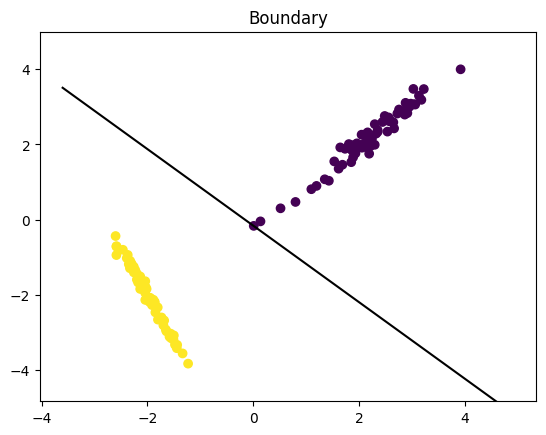

In [29]:
plt.scatter(X[:,0], X[:,1], c=y)
plt.plot(x1_vals, x2_vals, 'k-')
plt.ylim(min(X[:, 1]) - 1, max(X[:, 1]) + 1)
plt.title('Boundary')
plt.show()